In [174]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns
# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')



In [175]:
# reading the data
train = pd.read_csv('/home/james/Desktop/kaggle/Titanic Competition/data/train.csv')
test = pd.read_csv('/home/james/Desktop/kaggle/Titanic Competition/data/test.csv')

In [176]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [177]:
train.shape

(891, 12)

In [178]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [179]:
#pp.ProfileReport(train)

# EDA

### Missing data

In [180]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Age


In [181]:
# replace the missing values with the mean for age
train['Age'].fillna(train['Age'].mean(), inplace= True)

In [182]:
train['Age'].isnull().sum()

0

#### Cabin

In [183]:
train['Cabin'].isnull().sum()

687

In [184]:
# drop column cabin
train.drop(['Cabin'], axis=1, inplace=True)

#### Embarked

In [185]:
train['Embarked'].isnull().sum()

2

In [186]:
# drop the missing values
train.dropna(subset=['Embarked'], axis=0, inplace=True)

In [187]:
train['Embarked'].isnull().sum()

0

In [188]:
# Drop the column Name
train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [189]:
train.drop(['Fare'], axis=1, inplace=True)

In [190]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


### outliers

#### IQR

In [191]:
# calculating the IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)

IQR = Q3 - Q1

In [192]:
print(IQR)

PassengerId    444.0
Survived         1.0
Pclass           1.0
Age             13.0
SibSp            1.0
Parch            0.0
dtype: float64


In [193]:
# using the IQR score to detect the outliers
const = 1.5*IQR

In [194]:
outliersQ1 = train < Q1 - const
print (outliersQ1)

       Age  Embarked  Parch  PassengerId  Pclass    Sex  SibSp  Survived
0    False     False  False        False   False  False  False     False
1    False     False  False        False   False  False  False     False
2    False     False  False        False   False  False  False     False
3    False     False  False        False   False  False  False     False
4    False     False  False        False   False  False  False     False
..     ...       ...    ...          ...     ...    ...    ...       ...
886  False     False  False        False   False  False  False     False
887  False     False  False        False   False  False  False     False
888  False     False  False        False   False  False  False     False
889  False     False  False        False   False  False  False     False
890  False     False  False        False   False  False  False     False

[889 rows x 8 columns]


In [195]:
outliersQ3 = train > Q3 + const
print(outliersQ3)

       Age  Embarked  Parch  PassengerId  Pclass    Sex  SibSp  Survived
0    False     False  False        False   False  False  False     False
1    False     False  False        False   False  False  False     False
2    False     False  False        False   False  False  False     False
3    False     False  False        False   False  False  False     False
4    False     False  False        False   False  False  False     False
..     ...       ...    ...          ...     ...    ...    ...       ...
886  False     False  False        False   False  False  False     False
887  False     False  False        False   False  False  False     False
888  False     False   True        False   False  False  False     False
889  False     False  False        False   False  False  False     False
890  False     False  False        False   False  False  False     False

[889 rows x 8 columns]


In [196]:
# removing the outliers
train = train[~(outliersQ3).any(axis=1)]

In [197]:
train = train[~(outliersQ1).any(axis=1)]

# Univariate Analysis

### Survived

In [198]:
train['Survived'].value_counts()

0    421
1    220
Name: Survived, dtype: int64

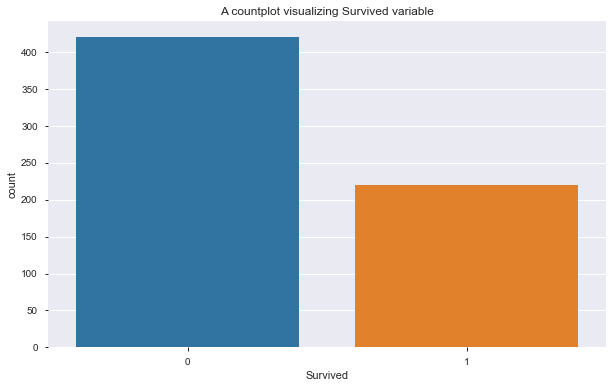

In [199]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing Survived variable')
sns.countplot(x='Survived', data=train)
plt.show()

#### Findings
    - 549 Passanger perished and 340 servived

### Sex

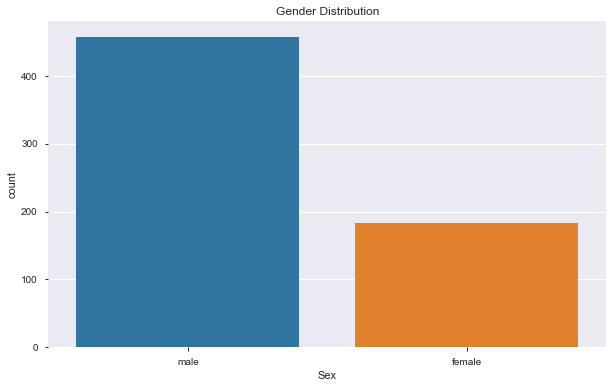

In [200]:
plt.figure(figsize=(10,6))
plt.title('Gender Distribution')
sns.countplot(x='Sex', data=train)
plt.show()

### Embarked

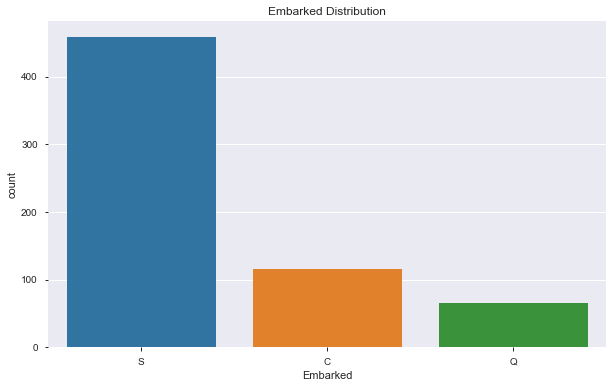

In [201]:
plt.figure(figsize=(10,6))
plt.title('Embarked Distribution')
sns.countplot(x='Embarked', data=train)
plt.show()

### Pclass

In [202]:
train['Pclass'].value_counts()

3    373
1    142
2    126
Name: Pclass, dtype: int64

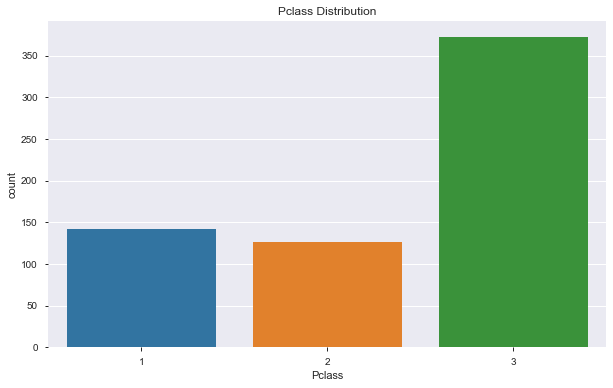

In [203]:
plt.figure(figsize=(10,6))
plt.title('Pclass Distribution')
sns.countplot(x='Pclass', data=train)
plt.show()

### Age

In [204]:
# creating age bins from Age
train['Age_bins'] = pd.cut(x=train['Age'], bins=[20,29,39,49,59])

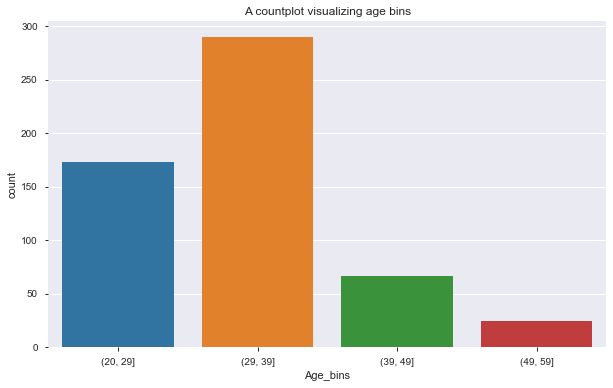

In [205]:
plt.figure(figsize=(10,6))
plt.title('A countplot visualizing age bins')
sns.countplot(x='Age_bins', data=train)
plt.show()

# Bivariate Analysis

#### Pclass vs Survived


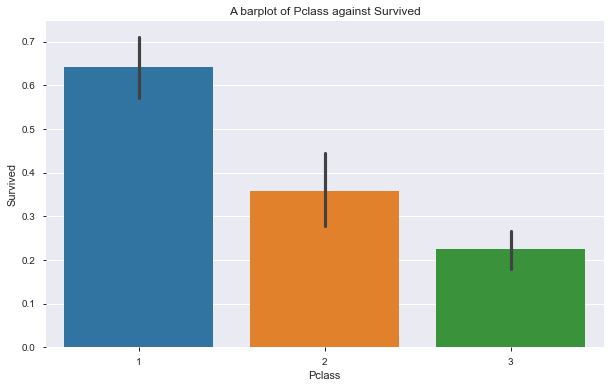

In [206]:
plt.figure(figsize=(10,6))
plt.title('A barplot of Pclass against Survived')
sns.barplot(train['Pclass'], train['Survived'])
plt.show()

### Age vs Survived


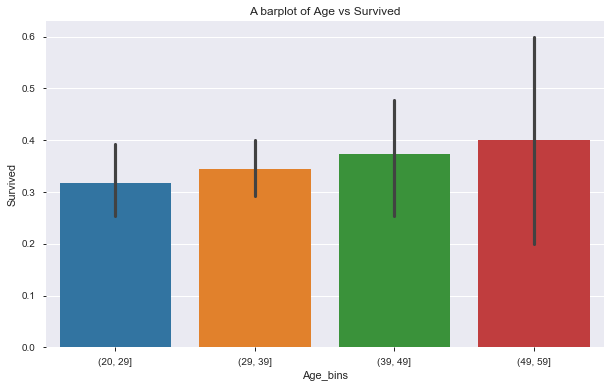

In [207]:
plt.figure(figsize=(10,6))
plt.title('A barplot of Age vs Survived')
sns.barplot(train['Age_bins'], train['Survived'])
plt.show()

### Sex vs Survived

In [208]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_bins
0,1,0,3,male,22.0,1,0,S,"(20, 29]"
1,2,1,1,female,38.0,1,0,C,"(29, 39]"
2,3,1,3,female,26.0,0,0,S,"(20, 29]"
3,4,1,1,female,35.0,1,0,S,"(29, 39]"
4,5,0,3,male,35.0,0,0,S,"(29, 39]"


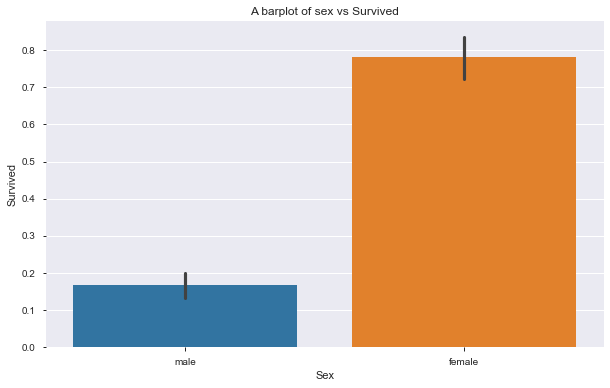

In [209]:
plt.figure(figsize=(10,6))
plt.title('A barplot of sex vs Survived')
sns.barplot(train['Sex'], train['Survived'])
plt.show()

### Embarked vs Survived

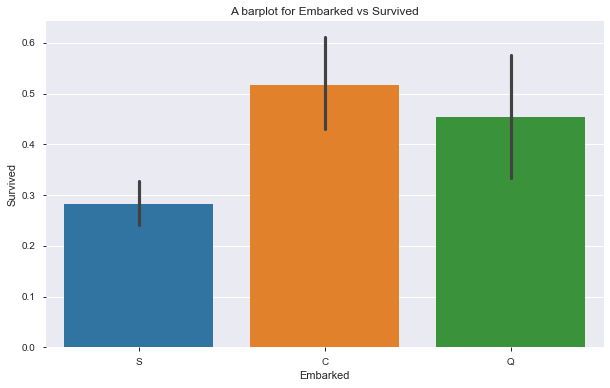

In [210]:
plt.figure(figsize=(10,6))
plt.title('A barplot for Embarked vs Survived')
sns.barplot(train['Embarked'], train['Survived'])
plt.show()

### Feature Engineering

In [211]:
# transforming categorical variables to numeric form
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
SibSp             int64
Parch             int64
Embarked         object
Age_bins       category
dtype: object

#### Label Encoding

In [212]:
# init label encoding
Encoder = LabelEncoder()

In [213]:
cat_features = ['Sex', 'Embarked']

In [214]:
Encoded = train[cat_features].apply(Encoder.fit_transform)

In [215]:
print(Encoded)

     Sex  Embarked
0      1         2
1      0         0
2      0         2
3      0         2
4      1         2
..   ...       ...
884    1         2
886    1         2
887    0         2
889    1         0
890    1         1

[641 rows x 2 columns]


In [216]:
train.rename(columns={'Sex':'Sex_c','Embarked':'Embarked_c'}, inplace=True)

In [217]:
train = pd.concat([train, Encoded], axis=1)

In [218]:
train.head()

,PassengerId,Survived,Pclass,Sex_c,Age,SibSp,Parch,Embarked_c,Age_bins,Sex,Embarked
0,1,0,3,male,22.0,1,0,S,"(20, 29]",1,2
1,2,1,1,female,38.0,1,0,C,"(29, 39]",0,0
2,3,1,3,female,26.0,0,0,S,"(20, 29]",0,2
3,4,1,1,female,35.0,1,0,S,"(29, 39]",0,2
4,5,0,3,male,35.0,0,0,S,"(29, 39]",1,2


In [219]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex_c            object
Age             float64
SibSp             int64
Parch             int64
Embarked_c       object
Age_bins       category
Sex               int64
Embarked          int64
dtype: object

In [220]:
test.drop(['Name','Cabin'], axis=1, inplace=True)

In [221]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [222]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [223]:
Test_cat_features = ['Sex','Embarked']

In [224]:
Encoded = test[Test_cat_features].apply(Encoder.fit_transform)

In [225]:
Encoded

,Sex,Embarked
0,1,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
413,1,2
414,0,0
415,1,2
416,1,2


In [226]:
test.rename(columns={'Sex':'Sex_c','Embarked':'Embarked_c'}, inplace=True)

In [227]:
test=pd.concat([test,Encoded],axis=1)

In [228]:
test.drop(['Ticket','Fare'],axis=1, inplace=True)

In [229]:
test.head()

,PassengerId,Pclass,Sex_c,Age,SibSp,Parch,Embarked_c,Sex,Embarked
0,892,3,male,34.5,0,0,Q,1,1
1,893,3,female,47.0,1,0,S,0,2
2,894,2,male,62.0,0,0,Q,1,1
3,895,3,male,27.0,0,0,S,1,2
4,896,3,female,22.0,1,1,S,0,2


In [230]:
test.drop(['Sex_c','Embarked_c'],axis=1,inplace=True)

In [231]:
test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Sex             0
Embarked        0
dtype: int64

In [232]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,0.636364,1.401914
std,120.810458,0.841838,14.181209,0.896760,0.981429,0.481622,0.854496
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,1.000000,2.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,1.000000,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,1.000000,2.000000


In [233]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [234]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex            0
Embarked       0
dtype: int64

In [235]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Embarked'], dtype='object')

In [236]:
train.head()

,PassengerId,Survived,Pclass,Sex_c,Age,SibSp,Parch,Embarked_c,Age_bins,Sex,Embarked
0,1,0,3,male,22.0,1,0,S,"(20, 29]",1,2
1,2,1,1,female,38.0,1,0,C,"(29, 39]",0,0
2,3,1,3,female,26.0,0,0,S,"(20, 29]",0,2
3,4,1,1,female,35.0,1,0,S,"(29, 39]",0,2
4,5,0,3,male,35.0,0,0,S,"(29, 39]",1,2


In [237]:
train.drop(['Sex_c','Embarked_c'],axis=1, inplace=True)

In [238]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Age_bins,Sex,Embarked
0,1,0,3,22.0,1,0,"(20, 29]",1,2
1,2,1,1,38.0,1,0,"(29, 39]",0,0
2,3,1,3,26.0,0,0,"(20, 29]",0,2
3,4,1,1,35.0,1,0,"(29, 39]",0,2
4,5,0,3,35.0,0,0,"(29, 39]",1,2


In [239]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,Embarked
0,892,3,34.5,0,0,1,1
1,893,3,47.0,1,0,0,2
2,894,2,62.0,0,0,1,1
3,895,3,27.0,0,0,1,2
4,896,3,22.0,1,1,0,2


## Modeling

In [240]:
P_features = ['Sex', 'Embarked','Age','Pclass','SibSp','Parch' ]

In [243]:
X= train[P_features]
y=train.Survived
X_test= test.drop('PassengerId',axis=1).copy()

In [244]:
X.shape, y.shape,X_test.shape

((641, 6), (641,), (418, 6))

### DecisionTreeClassifier

In [245]:
#init the classifier
model = DecisionTreeClassifier()

In [246]:
# train the model
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [247]:
# predict
S_pred = model.predict(X_test)

In [248]:
S_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [249]:
# evaluating the model
model.score(X,y)

0.9173166926677067

In [251]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": S_pred
    })

In [252]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [260]:
submission.to_csv('submission1.csv', index=False )

In [257]:
sub=pd.read_csv('/home/james/Desktop/kaggle/Titanic Competition/data/gender_submission.csv')

In [258]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
